In [6]:
import overpass
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import math
from PIL import Image

x1=10.0167
x2=10.0256
y1=53.5598
y2=53.5643

In [15]:
osm_filter = ('["area"!~"yes"]["highway"!~"footway|steps|corridor|motor|proposed|construction|abandoned|platform|raceway|service"]["bicycle"!~"no"]["service"!~"private"]["access"!~"private"]')

In [26]:
#create bbox image amd save
def AreaToStreetNetworkImage(x1, x2, y1, y2, buffer=10, resolution= 0.2,network_type='drive'):
    graph = ox.graph_from_bbox(x1, x2, y1, y2,network_type= network_type)
    type(graph)
    fig, ax = ox.plot.plot_figure_ground(graph, file_format = 'png',filename='img1',edge_color='#999999', bgcolor='w',fig_length=5,show=True)
    plt.tight_layout()
    #dist (numeric) – how many meters to extend north, south, east, and west from the center point
   # ox.save_graph(graph=G, name=name, simplify=simplify, plot=plot)

In [8]:
AreaToStreetNetworkImage(10.0167,10.0256,53.5598,53.5643)


EmptyOverpassResponse: There are no data elements in the response JSON objects

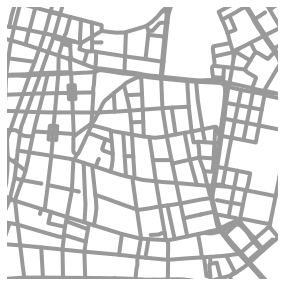

<Figure size 432x288 with 0 Axes>

In [27]:
AreaToStreetNetworkImage(48.2251,48.1958,16.3618,16.3365)

resolution: how much of the ground area is covered by one pixel.The aerial images cover 0.2m*0.2m/pixel and the output image should have the same resolution.
per pixel will cover .04m2.
if total number of pixel=200*200=40000
then the total number of area should be=1600m2

In [12]:
# calculate total bounding_box area
#BB area = R^2 * (cos(f2)-cos(f1)) * (l2-l1) / 180 (kilometers)
def get_bbox_area(x1,x2,y1,y2,R= 6371.0072):
    BB_area = R**2 * (math.cos(x2)-math.cos(x1)) * (y2-y1) / 180
    return BB_area

In [14]:
#total area in meter2
total_area = get_bbox_area(10.0167,10.0256,53.5598,53.5643)*1000
total_area

5072.315601356977

In [30]:
total_area = calculate_bbox_area(48.2251,48.1958,16.3618,16.3365)

In [28]:
#calculate total amount of pixel
def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return width*height

In [29]:
totalpixel = get_num_pixels(r"C:\Users\sulta\Desktop\Work\OSM\images\img1.png")
totalpixel

1278028

"EmptyOverpassResponse" - dont get any image for this data . function "get_area_resulation" is not work in this case. only work if we get image from bbox
possible solution: fixed the image size, in that case the total number of  pixel is always same

In [30]:
#calculate total amount of area/pixel
def get_area_resulation(area, pixel):
    res = area/pixel
    return res

In [31]:
get_area_resulation(total_area,totalpixel)

0.003968861090177193